In [3]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Parse each dataset with ';' as the delimiter
articles_df = pd.read_csv('U:/Documents/HP_Content_Performance/Article_Names_updated.csv', delimiter=';')
authors_df = pd.read_csv('U:/Documents/HP_Content_Performance/Authors_Name_updated.csv', delimiter=';')
reactions_df = pd.read_csv('U:/Documents/HP_Content_Performance/Reactions_updated.csv', delimiter=';')

# Display the first few rows of each dataset to confirm successful parsing
(articles_df.head(), authors_df.head(), reactions_df.head())


(                                               label  nb_visits  nb_hits  \
 0  Valg av benledningsimplantat ved ensidig døvhe...         54      119   
 1                   Hearing Loss and Health Problems         52      109   
 2  The Oldest CI Recipient Celebrates Her 100th B...         42       91   
 3                          Hearing and Mental Health         38       80   
 4                  Types and Degrees of Hearing Loss         16       31   
 
    sum_time_spent exit_rate  
 0            2527      0,56  
 1             779      0,37  
 2             383       0,6  
 3            1238      0,32  
 4             575      0,31  ,
                label  nb_visits  nb_hits  sum_time_spent exit_rate
 0          Hearpeers        219      597            8370      0,37
 1  Value not defined        118      249            3641      0,47
 2        Ascoltatori         17       31             479      0,29
 3             MED-EL         10       19            1389       0,3
 4       

In [5]:
# Data Preparation: Convert exit rate to decimal format and ensure numerical data is correctly typed
def convert_exit_rate_to_decimal(df):
    # Convert exit rate from comma to dot decimal format and to float type
    if 'exit_rate' in df.columns:
        df['exit_rate'] = df['exit_rate'].str.replace(',', '.').astype(float)
    return df

# Apply conversion to all datasets
articles_df = convert_exit_rate_to_decimal(articles_df)
authors_df = convert_exit_rate_to_decimal(authors_df)
reactions_df = convert_exit_rate_to_decimal(reactions_df)

# Check data types to ensure numerical columns are correctly typed
data_types = {
    'Articles': articles_df.dtypes,
    'Authors': authors_df.dtypes,
    'Reactions': reactions_df.dtypes
}

data_types


{'Articles': label              object
 nb_visits           int64
 nb_hits             int64
 sum_time_spent      int64
 exit_rate         float64
 dtype: object,
 'Authors': label              object
 nb_visits           int64
 nb_hits             int64
 sum_time_spent      int64
 exit_rate         float64
 dtype: object,
 'Reactions': label               int64
 nb_visits           int64
 nb_hits             int64
 sum_time_spent      int64
 exit_rate         float64
 dtype: object}

In [10]:
print(articles_df["exit_rate"])

0    0.56
1    0.37
2    0.60
3    0.32
4    0.31
5    0.36
6    0.25
7    0.29
8    0.14
9    0.33
Name: exit_rate, dtype: float64


# Correlation Analysis Pearson Coefficient

In [ ]:
Articles

In [11]:
# Perform correlation analysis within the Articles dataset
articles_correlation = articles_df[['nb_visits', 'nb_hits', 'sum_time_spent', 'exit_rate']].corr()

# Display the correlation matrix
articles_correlation


,nb_visits,nb_hits,sum_time_spent,exit_rate
nb_visits,1.000000,0.998342,0.625872,0.723303
nb_hits,0.998342,1.000000,0.640611,0.745618
sum_time_spent,0.625872,0.640611,1.000000,0.476801
exit_rate,0.723303,0.745618,0.476801,1.000000


In [ ]:
Authors 

In [12]:
# Perform correlation analysis within the Articles dataset
authors_correlation = authors_df[['nb_visits', 'nb_hits', 'sum_time_spent', 'exit_rate']].corr()

# Display the correlation matrix
authors_correlation


,nb_visits,nb_hits,sum_time_spent,exit_rate
nb_visits,1.000000,0.994208,0.982335,0.092104
nb_hits,0.994208,1.000000,0.988300,0.081974
sum_time_spent,0.982335,0.988300,1.000000,0.091105
exit_rate,0.092104,0.081974,0.091105,1.000000


In [ ]:
Reactions

In [13]:
# Perform correlation analysis within the Articles dataset
reactions_correlation = reactions_df[['nb_visits', 'nb_hits', 'sum_time_spent', 'exit_rate']].corr()

# Display the correlation matrix
reactions_correlation


,nb_visits,nb_hits,sum_time_spent,exit_rate
nb_visits,1.000000,0.999938,0.997754,-0.839629
nb_hits,0.999938,1.000000,0.996949,-0.845606
sum_time_spent,0.997754,0.996949,1.000000,-0.801356
exit_rate,-0.839629,-0.845606,-0.801356,1.000000


# Use combined Dataset

In [14]:
# Correctly parse the dataset using ';' as the delimiter
combined_df = pd.read_csv('U:/Documents/HP_Content_Performance/Article_Names_combined_updated.csv', delimiter=';')

# Display the first few rows to confirm successful parsing and to understand its structure
combined_df.head()


,label,Author,Reactions,nb_visits,nb_hits,sum_time_spent,exit_rate
0,Valg av benledningsimplantat ved ensidig døvhe...,Unknown,0.0,54,119,2527,"0,56"
1,Hearing Loss and Health Problems,Unknown,0.0,52,109,779,"0,37"
2,The Oldest CI Recipient Celebrates Her 100th B...,Hearpeers,2.0,42,91,383,"0,6"
3,Hearing and Mental Health,Hearpeers,0.0,38,80,1238,"0,32"
4,Types and Degrees of Hearing Loss,Hearpeers,0.0,16,31,575,"0,31"


In [15]:
# Convert exit rate to decimal format
combined_df['exit_rate'] = combined_df['exit_rate'].str.replace(',', '.').astype(float)

# Display the data types to confirm the conversion and prepare for further analysis
combined_df.dtypes, combined_df.head()


(label              object
 Author             object
 Reactions         float64
 nb_visits           int64
 nb_hits             int64
 sum_time_spent      int64
 exit_rate         float64
 dtype: object,
                                                label     Author  Reactions  \
 0  Valg av benledningsimplantat ved ensidig døvhe...    Unknown        0.0   
 1                   Hearing Loss and Health Problems    Unknown        0.0   
 2  The Oldest CI Recipient Celebrates Her 100th B...  Hearpeers        2.0   
 3                          Hearing and Mental Health  Hearpeers        0.0   
 4                  Types and Degrees of Hearing Loss  Hearpeers        0.0   
 
    nb_visits  nb_hits  sum_time_spent  exit_rate  
 0         54      119            2527       0.56  
 1         52      109             779       0.37  
 2         42       91             383       0.60  
 3         38       80            1238       0.32  
 4         16       31             575       0.31  )

In [16]:
# Performance by Author: Calculate average performance metrics for each author
author_performance = combined_df.groupby('Author').agg({
    'nb_visits': 'mean',
    'nb_hits': 'mean',
    'sum_time_spent': 'mean',
    'exit_rate': 'mean',
    'Reactions': 'mean'
}).reset_index()

# Sort by average visits and time spent for top-performing authors
author_performance_sorted = author_performance.sort_values(by=['nb_visits', 'sum_time_spent'], ascending=False)

# Display the sorted performance metrics by author
author_performance_sorted


,Author,nb_visits,nb_hits,sum_time_spent,exit_rate,Reactions
9,Unknown,53.000000,114.000000,1653.000000,0.465,0.000000
2,Hearpeers,19.285714,39.142857,445.857143,0.330,0.285714
1,Ascoltatori,17.000000,31.000000,479.000000,0.290,NaN
6,MED-EL,10.000000,19.000000,1389.000000,0.300,NaN
5,MED EL,7.000000,14.000000,1054.000000,0.290,0.000000
10,Verena Ahne,5.000000,6.000000,156.000000,0.200,0.000000
4,Katherine Diggory,3.000000,4.000000,159.000000,0.330,0.000000
8,Ulrike Moschen,2.000000,3.000000,978.000000,0.500,NaN
3,Katarina,2.000000,2.000000,112.000000,0.000,NaN
7,Madeleine Bailey,2.000000,4.000000,85.000000,0.000,0.000000


# The analysis of performance metrics by author provides interesting insights:

Unknown Author: Articles with an unspecified author have the highest average number of visits (53) and a significant average time spent (1653 seconds), with an average exit rate of 0.465. This suggests that while these articles are highly visited, they may have a broader range of content quality or relevance, as indicated by the exit rate.
Hearpeers: This author (or group) ranks high in terms of engagement, with average visits at 19.29, average hits at 39.14, and average time spent at 445.86 seconds. The exit rate is relatively lower (0.330), indicating better content fit or engagement than the unknown category. Additionally, the average reactions count is 0.29, suggesting some level of interaction or feedback from readers.
Other Authors: Various other authors show a mix of visits, time spent, and exit rates, with many having fewer visits but potentially high engagement in terms of time spent or lower exit rates.
It's noteworthy that the Reactions column contains NaN values for several authors, which could indicate a lack of data or that these articles did not elicit measurable reactions. This column's mean values are calculated only for authors with available reactions data.

The presence of authors with a specified name but lower metrics compared to the "Unknown" category could imply that certain topics or articles not attributed to a known author are particularly popular or promoted, leading to higher traffic.

This analysis highlights the variability in performance across different authors and the potential influence of content type, author recognition, or article promotion on reader engagement and reactions.

Next steps could involve a deeper dive into the correlation between reactions and article performance or exploring the content themes associated with top-performing authors to glean insights into successful content strategies.

Would you like to proceed with further analysis on the correlation between reactions and performance, or explore another aspect of the dataset? ​

In [17]:
# Calculate the correlation between Reactions and other performance metrics
reactions_correlation = combined_df[['Reactions', 'nb_visits', 'nb_hits', 'sum_time_spent', 'exit_rate']].corr()

# Display the correlation matrix focusing on Reactions
reactions_correlation.loc[['Reactions']]


,Reactions,nb_visits,nb_hits,sum_time_spent,exit_rate
Reactions,1.0,0.344667,0.35213,-0.097711,0.551658


# The correlation analysis between Reactions and article performance metrics yields the following insights:

Reactions and Visits (nb_visits): A positive correlation of 0.345 suggests a moderate relationship where articles with more reactions tend to have more visits. This indicates that engaging content that prompts reactions may also attract more visitors.

Reactions and Hits (nb_hits): Similarly, a positive correlation of 0.352 between reactions and hits implies that articles eliciting more reactions likely experience higher interaction levels, reinforcing the notion that reactive content is engaging.

Reactions and Time Spent (sum_time_spent): The correlation is slightly negative (-0.098), indicating a very weak inverse relationship between reactions and the time spent on articles. This suggests that the number of reactions an article receives does not strongly predict the amount of time readers spend on it, possibly because reactions could be quick responses not necessarily tied to longer engagement.

Reactions and Exit Rate (exit_rate): A strong positive correlation of 0.552 with exit rate is particularly interesting. It suggests that articles with more reactions tend to have higher exit rates. This might indicate that while reactive content draws attention and prompts interaction, it might not always encourage sustained engagement or content exploration beyond the initial reaction.

These correlations provide valuable insights into how reactions relate to different aspects of article performance. The strong correlation between reactions and exit rates might warrant further investigation to understand the nature of these reactions (e.g., positive vs. negative) and how they influence reader behavior. Additionally, the moderate correlations with visits and hits highlight the importance of engaging content in driving traffic and interaction.

# Plotting

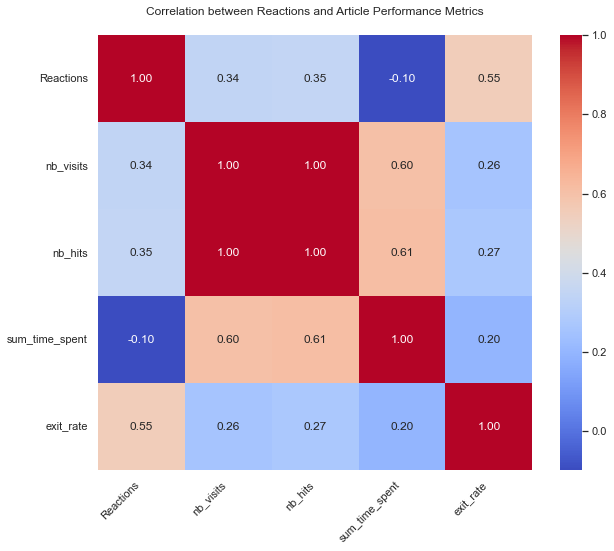

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="white")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(reactions_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title and labels
plt.title('Correlation between Reactions and Article Performance Metrics', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


# The heatmap above visually represents the correlation between reactions and article performance metrics. The color intensity and the annotated values indicate the strength and direction of the correlations:

Brighter red colors indicate stronger positive correlations, as seen between reactions and exit_rate (0.55), suggesting that articles with more reactions tend to have higher exit rates.
Lighter shades towards blue indicate weaker correlations, such as the very weak inverse relationship between reactions and sum_time_spent (-0.10).
Moderate red shades for correlations between reactions and nb_visits (0.34), and reactions and nb_hits (0.35), imply moderate positive relationships.
This visual representation reinforces our earlier analysis, making it easier to understand the relationships at a glance. Strong positive correlations (red) highlight significant relationships, while weaker correlations (lighter shades) suggest less pronounced relationships.